In [6]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict

In [2]:
load_dotenv()

True

In [4]:
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [7]:
class LLMQA_state(TypedDict):
    question: str
    answer: str

In [8]:
def llmqa(state: LLMQA_state) -> LLMQA_state:
    question = state["question"]
    answer = model.invoke(question).content

    state["answer"] = answer

    return state

In [9]:
graph = StateGraph(LLMQA_state)

graph.add_node("llmqa", llmqa)

graph.add_edge(START, "llmqa")
graph.add_edge("llmqa", END)

workflow = graph.compile()

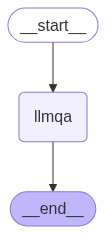

In [10]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [11]:
initial_state = {"question": "How are you?"}
final_state = workflow.invoke(initial_state)

print(final_state)

{'question': 'How are you?', 'answer': "I am doing well, thank you for asking! As a large language model, I don't experience emotions or feelings in the same way humans do, but I am functioning optimally and ready to assist you. How can I help you today?"}
